In [64]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const

In [65]:
with open('Data/Aufgabe_4.3.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T
for i in range(len(data[1])):
    data[0][i]-= 704000


data = f.channel_to_pos(data,cal)

In [66]:
data[1] = data[1]*100
yerr = 0.035339825186025027*np.abs(data[1])
print(np.mean(data[2]))

0.005523315120672314


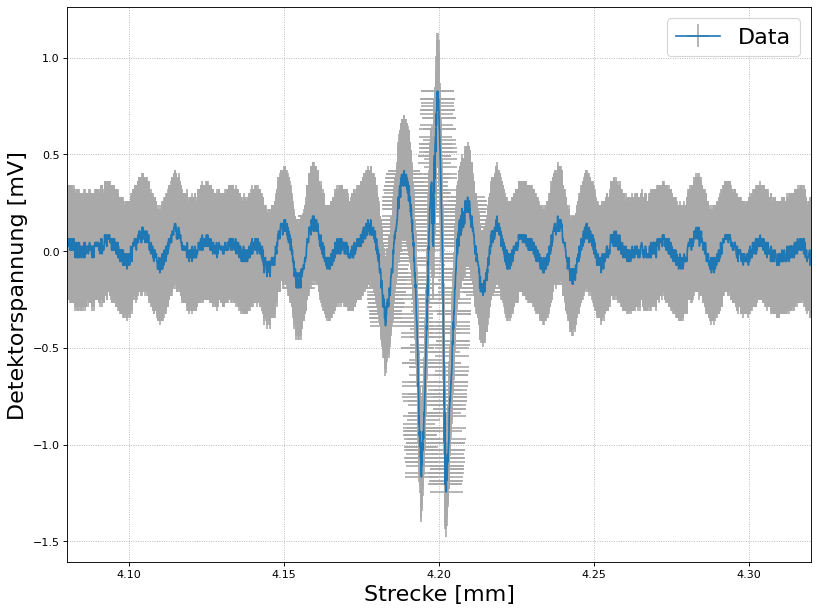

In [81]:
f.figsize(1)
plt.errorbar(data[0],data[1],yerr=yerr,xerr=data[2],label = 'Data',ecolor='darkgray')
f.form([4.08,4.32],xlabel='Strecke [mm]',ylabel='Detektorspannung [mV]')


Globales maximum bei 4.199407999308831 +/- 0.005340483210540105


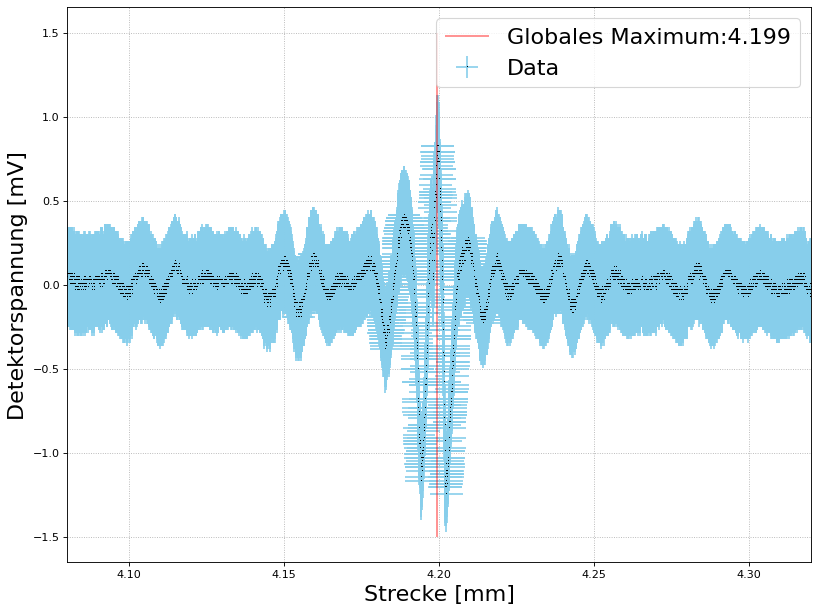

In [82]:
intensity = data[1]
position  = data[0]#*freq_scale

f.figsize(1)

intensity -= np.mean(intensity)

plt.errorbar(position,intensity,yerr=yerr,xerr=data[2],fmt=',k',label = 'Daten',ecolor = 'skyblue')
max    = np.argmax(intensity)
print(f'Globales maximum bei {position[max]} +/- {data[2][max]}')
plt.vlines(position[max],-1.5,1.5,colors="red",alpha=0.5,label=f'Globales Maximum:{round(position[max],3)}')
f.form([4.08,4.32],xlabel='Strecke [mm]',ylabel='Detektorspannung [mV]',name='Res/A4_Weisslichtpos.pdf')